### MODELO DE CLASIFICACIÓN

In [182]:
# Se importan librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

import warnings 
warnings.filterwarnings('ignore')

In [183]:
# Se carga el dataset 

dataset = pd.read_csv("C:/Users/dispe/OneDrive/Documentos/CLASES/MODULO 6/PROYECTO INTEGRADOR/Propuesta 2/ML_cars.csv") 

In [184]:
# Se visualiza el contenido de los datos
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [185]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

NORMALIZACIÓN DEL DATAFRAME

In [187]:
dataset1 = dataset.drop('car_ID', axis = 1) # Se elimina la columna "car_ID"

In [188]:
# Se ordenan los valores de 'price' de menor a mayos
dataset1.sort_values(by = 'price', inplace = True)

In [189]:
# Se calcula la mediana para la columna 'price' y se agrega una nueva columna la cual clasifica al auto por 'Barato' o 'Caro' dependiendo del precio

precio_mediana = dataset1['price'].median()
dataset1['sorting_price'] = np.where(dataset1['price'] < precio_mediana, 'Barato', 'Caro' )


In [190]:
print(precio_mediana)

10295.0


In [191]:
# Se observan los valores únicos de las columnas "doornumber" y "cylindernumber" (ambas columnas informaban números enteros escritos en texto)

dataset['doornumber'].unique() 
dataset['cylindernumber'].unique()

# Se crean dos diccionaros para cada columna con su correspondiente valor en número entero

puertas_auto = {'two' : 2, 'four' : 4}
numero_cilindros = {'four' : 4, 'six' : 6, 'five' : 5, 'three' : 3, 'twelve' : 12, 'two' : 2, 'eight' : 8}

# reemplaza el valor original de las columnas por su correspondiente en valor númerico

dataset1['doornumber'] = dataset1['doornumber'].replace(puertas_auto)
dataset1['cylindernumber'] = dataset1['cylindernumber'].replace(numero_cilindros)

In [192]:
# Se crea una lista con el nombre de las columnas categóricas a modificar por valores númericos

columnas_categoricas = ['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

# Se importa el módulo LabelEncoder

label_encoder = LabelEncoder()

# Se realiza el remplazo de valores números en las columnas detalladas de la lista
dataset1[columnas_categoricas] = dataset1[columnas_categoricas].apply(lambda col: label_encoder.fit_transform(col))

In [193]:
# Se detallan la etiqueta (label) y las características (feature)

y = dataset1['sorting_price']
X = dataset1.drop('sorting_price', axis = 1)


In [194]:
# Se divide el modelo con 20% de testeo y el restante 80% para entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [195]:
# Se entrena el modelo aplicando el modelo de Regresión Logística

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [196]:
# Realizamos la predicción con las características de testeo

y_pred = modelo.predict(X_test)

In [197]:
# Calculamos la matriz de confusión. VOLVER A REVEER (COMO LEER ESOS NÚMEROS)

cm = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusión: {cm}')

Matriz de Confusión: [[21  2]
 [ 0 18]]


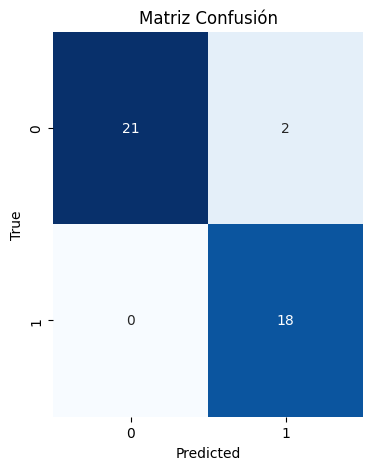

In [198]:
# Se grafica la matriz de confusión

plt.figure(figsize = (4, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz Confusión')
plt.show()

In [199]:
# Se calculan las métricas
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average= 'weighted')
f1 = f1_score(y_test, y_pred, average= 'weighted')




print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9512195121951219
Precision: 0.9560975609756098
Recall: 0.9512195121951219
F1 Score: 0.9513945617925079


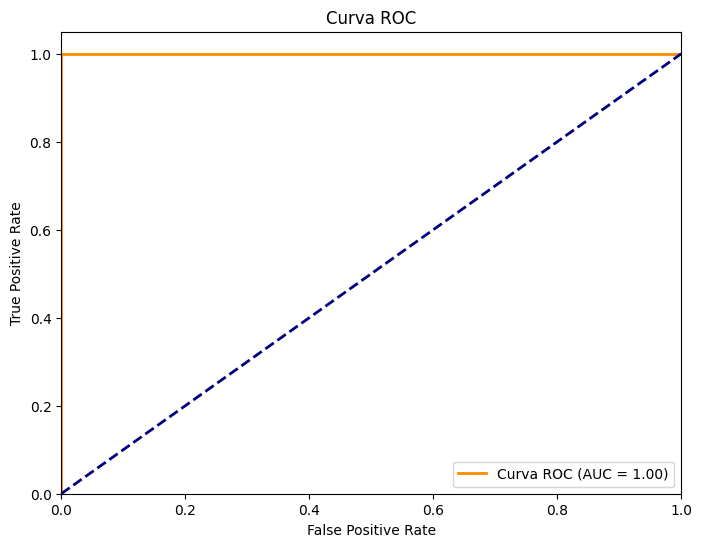

In [200]:
# Se grafica la curva ROC

y_pred_prob = modelo.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=['Barato', 'Caro'])[:, 0]

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)



plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [201]:
# Se calculan las correspondientes métricas

from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits= 5, shuffle= True, random_state= 42)

score = cross_val_score(modelo, X, y, cv = k_fold)

print(f'Score: {score}')
print(f'Mediana Score: {np.median(score)}')
print(f'Media Score: {np.mean(score)}')
print(f'Desviación Estándar Score: {np.std(score)}')

Score: [0.95121951 1.         1.         0.95121951 0.95121951]
Mediana Score: 0.9512195121951219
Media Score: 0.9707317073170731
Desviación Estándar Score: 0.02389746090520176


In [202]:
# Se calculan nuevamente las métricas, esta vez con un pipeline de por medio

k_fold2 = KFold(n_splits= 5, shuffle= True, random_state= 42)
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter= 1000))

score2 = cross_val_score(pipeline, X, y, cv = k_fold)

print(f'Score: {score2}')
print(f'Mediana Score: {np.median(score2)}')
print(f'Media Score: {np.mean(score2)}')
print(f'Desviación Estándar Score: {np.std(score2)}')

Score: [0.90243902 0.90243902 0.92682927 0.97560976 0.87804878]
Mediana Score: 0.9024390243902439
Media Score: 0.9170731707317075
Desviación Estándar Score: 0.03308453650305008


In [203]:
# Buscamos cuales son los mejores hiperparámetros para el modelo

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Definir pipeline
pipeline2 = Pipeline([( 'scaler', StandardScaler()),
                      ('logreg', LogisticRegression())])

# Definir diccionario de hiperparámetros
param_grid = {
    'logreg__C' : [0.1, 1, 10, 100],
    'logreg__solver' : ['lbgfs', 'liblinear']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline2, param_grid, cv = 5)

# Ajustar los hiperparámetros a los datos 
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'logreg__C': 1, 'logreg__solver': 'liblinear'}


In [204]:
# Entrenar el modelo final con los hiperparámetros C = 100 y solver = liblinear
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Se crea el modelo de Regresión Lineal con los parámetros correspondientes
modelo_final = LogisticRegression(C = 100, solver= 'liblinear')

# Se entrena el modelo
modelo_final.fit(X_train, y_train)

# Se predice el modelo
y_pred_clasificacion = modelo_final.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_clasificacion))

# Imprimir la confusión de matriz
print(confusion_matrix(y_test, y_pred_clasificacion))

              precision    recall  f1-score   support

      Barato       1.00      0.91      0.95        23
        Caro       0.90      1.00      0.95        18

    accuracy                           0.95        41
   macro avg       0.95      0.96      0.95        41
weighted avg       0.96      0.95      0.95        41

[[21  2]
 [ 0 18]]


In [205]:
# Se obtiene las probabilidades de predicción 
y_pred_prob2 = modelo_final.predict_proba(X_test)[:, 1]

# Se binariza la variable "y_test" ("Barato", "Caro")
y_test_bin2 = label_binarize(y_test, classes=['Barato', 'Caro'])[:, 0]


# Obtener curva ROC
fpr2, tpr2, thresholds2 = roc_curve(y_test_bin2, y_pred_prob2)

print(fpr2, tpr2, thresholds2)


[0. 0. 0. 1.] [0.         0.88888889 1.         1.        ] [           inf 1.00000000e+00 9.99999747e-01 2.64165936e-16]


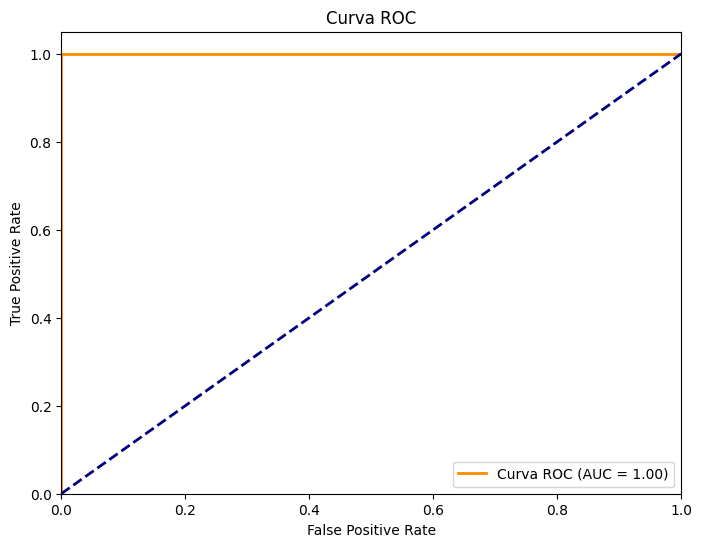

In [206]:
# Graficar nuevamente curva ROC

plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### MODELO DE REGRESIÓN

In [207]:
# Se importan librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler


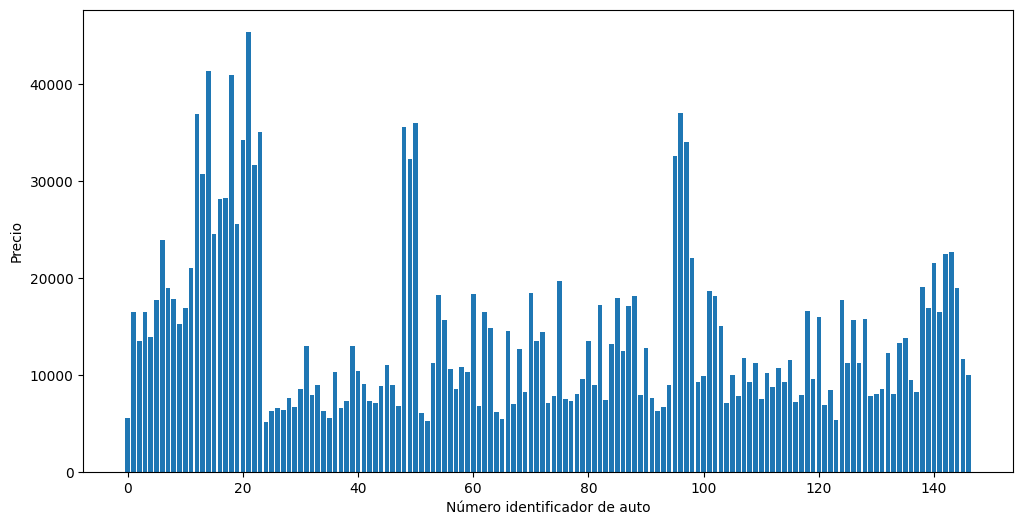

In [208]:
# Se visualizan los datos

plt.figure(figsize=(12, 6))
plt.bar(dataset1['CarName'], dataset1['price'])
plt.ylabel('Precio')
plt.xlabel('Número identificador de auto')
plt.show()

In [209]:
# Se definen las variables de entrada y salida
X2 = dataset1.drop('sorting_price', axis = 1)
y2 = dataset1['price']

In [210]:
# Se dividen los datos
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 0.2, random_state= 42)

In [211]:
# Se define el modelo
modelo_regresion = LinearRegression()

In [212]:
# Se entrena el modelo
modelo_regresion.fit(X2_train, y2_train)

LinearRegression()

In [221]:
# Realizamos la predicción con las características de testeo
y_pred_regresion = modelo_regresion.predict(X2_test)

In [214]:
# Se realizan las métricas correspondientes
mse2 = mean_squared_error(y2_test, y_pred_regresion)
mae2 = mean_absolute_error(y2_test, y_pred_regresion)
r2_2 = r2_score(y2_test, y_pred_regresion)
rmse = np.sqrt(mse2)


print(f'MSE: {mse2}')
print(f'MAE: {mae2}')
print(f'R2: {r2_2}')
print(f'RMSE: {rmse}')

MSE: 5.8507896985458056e-24
MAE: 1.5084302370868077e-12
R2: 1.0
RMSE: 2.418840569063163e-12


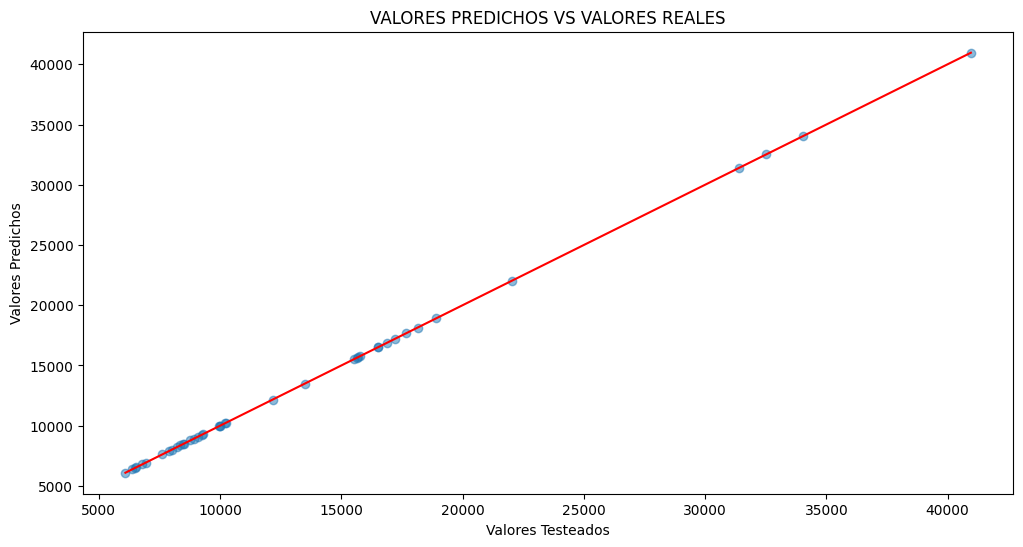

In [215]:
# Se visualizan los datos
plt.figure(figsize = (12,6))
plt.scatter(y2_test, y_pred_regresion, alpha = 0.5)
plt.xlabel('Valores Testeados')
plt.ylabel('Valores Predichos')
plt.title('VALORES PREDICHOS VS VALORES REALES')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red')  # Línea de identidad
plt.show()

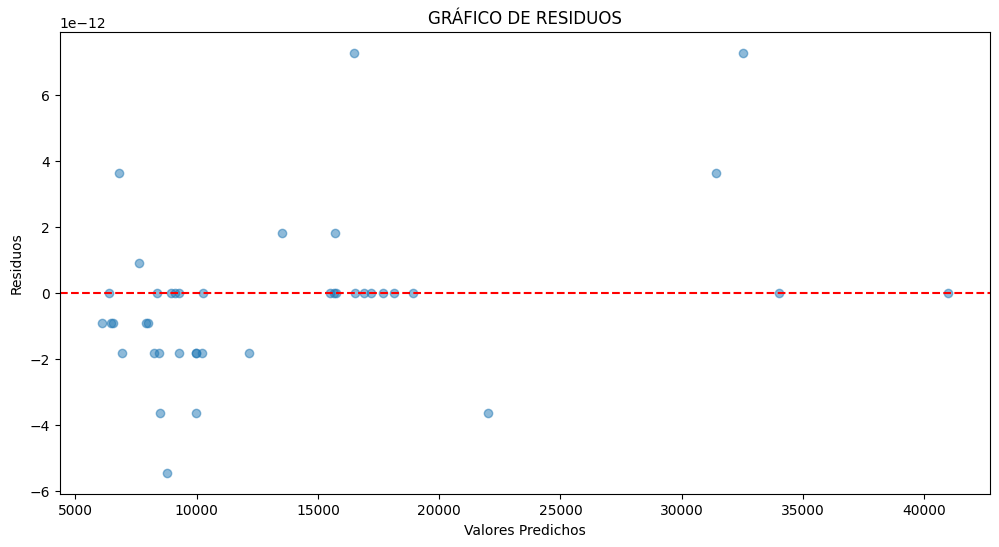

In [216]:
# Realizamos un gráfico de residuos 
residuos = y2_test - y_pred_regresion

plt.figure(figsize = (12,6))
plt.scatter(y_pred_regresion, residuos, alpha = 0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.ylabel('Residuos')
plt.xlabel('Valores Predichos')
plt.title('GRÁFICO DE RESIDUOS')
plt.show()

In [217]:
# Realizamos un Cross Validation
from sklearn.model_selection import cross_val_score

cross_validation = cross_val_score(modelo_regresion, X2, y2, cv = 5, scoring= 'neg_mean_squared_error')

print(f'Desviación Estándar MSE: {np.std(-cross_validation)}')
print(f'Media MSE: {np.mean(-cross_validation)}')

Desviación Estándar MSE: 8.125833870095702e-24
Media MSE: 1.847235533789152e-23


In [218]:
# Finalmente, creamos un código para guardar las predicciones en un archivo de texto plano

# Primero las predicciones del modelo de clasificación
predicciones_modelo_clasificacion = 'y_pred_clasificacion.txt'

with open(predicciones_modelo_clasificacion, 'w') as file:
    for prediccion_clasificacion in y_pred_clasificacion:
        file.write(f"{prediccion_clasificacion}\n")
        
print(f'Las predicciones del modelo de clasificación han sido guardadas en {predicciones_modelo_clasificacion}')

# Ahora las predicciones del modelo de clasificación
predicciones_modelo_regresion = 'y_pred_regresion.txt'

with open(predicciones_modelo_regresion, 'w') as file:
    for prediccion_regresion in y_pred_regresion:
        file.write(f"{prediccion_regresion}\n")
        
print(f'Las predicciones del modelo de regresión han sido guardadas en {predicciones_modelo_regresion}')

Las predicciones del modelo de clasificación han sido guardadas en y_pred_clasificacion.txt
Las predicciones del modelo de regresión han sido guardadas en y_pred_regresion.txt
